In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [216]:
df = pd.read_csv("pokemon.csv")
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [217]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

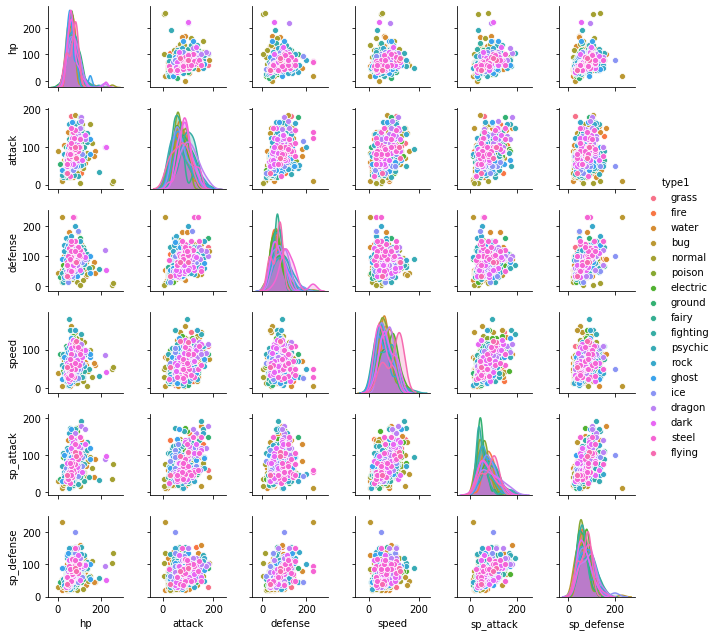

In [218]:
habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

# df.columns.hp.index
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

sns.pairplot(habilidades, height=1.5, hue='type1');

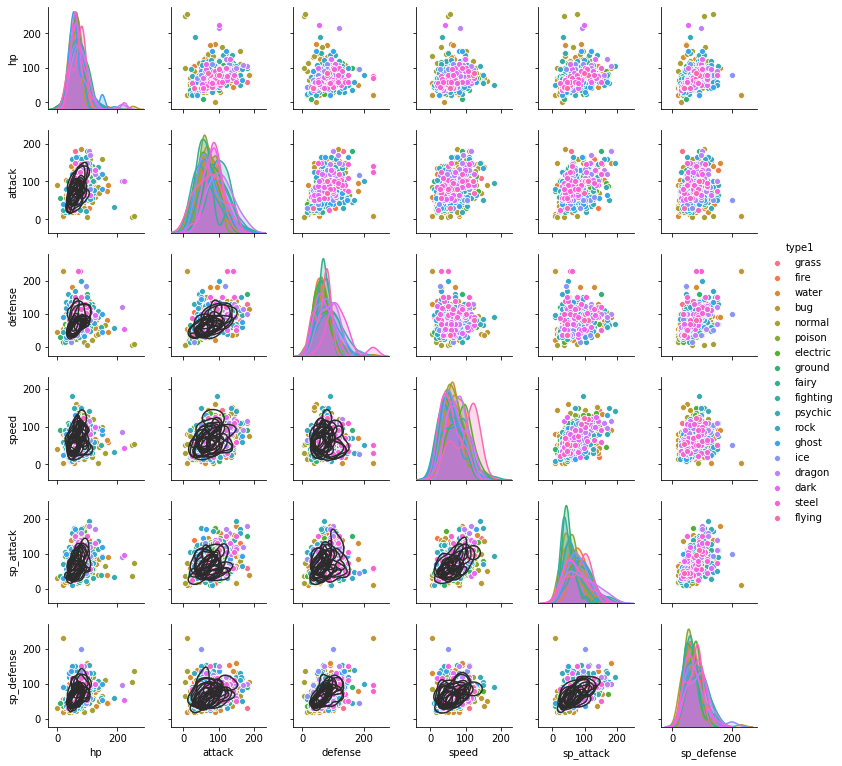

In [97]:
habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

g = sns.pairplot(habilidades, height=1.8, hue='type1', diag_kind="kde")
g.map_lower(sns.kdeplot, levels=1, color=".2")

In [199]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [200]:
df.type1.value_counts(normalize = True)

water       0.142322
normal      0.131086
grass       0.097378
bug         0.089888
psychic     0.066167
fire        0.064919
rock        0.056180
electric    0.048689
ground      0.039950
poison      0.039950
dark        0.036205
fighting    0.034956
dragon      0.033708
ghost       0.033708
steel       0.029963
ice         0.028714
fairy       0.022472
flying      0.003745
Name: type1, dtype: float64

In [201]:
# Com esse comando pode-se observar as colunas incompletas, estas não serão utilizadas para a predição pois caso o código
# as vejam como relevante, quando elas estiverem faltando a uma maior chance de erro

df.isnull().sum().sort_values(ascending = False)[:5] 

type2              384
percentage_male     98
height_m            20
weight_kg           20
is_legendary         0
dtype: int64

In [202]:
# df.groupby("type1").against_bug.describe().sort_values(by = "mean", ascending = False) # n sei se precisa


# habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
# for i in habilidades:
#     df.groupby("type1").i.describe().sort_values(by = "mean", ascending = False)
# #     print(i)
#  pensar se vamos usar isso 

In [228]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]
x.head(2)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5


In [229]:
from sklearn.model_selection import train_test_split #biblioteca sklearn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [230]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier () 
m = model1.fit(x_train, y_train)

In [244]:

clf = x
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
xclf, yclf = x, y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xclf, yclf)

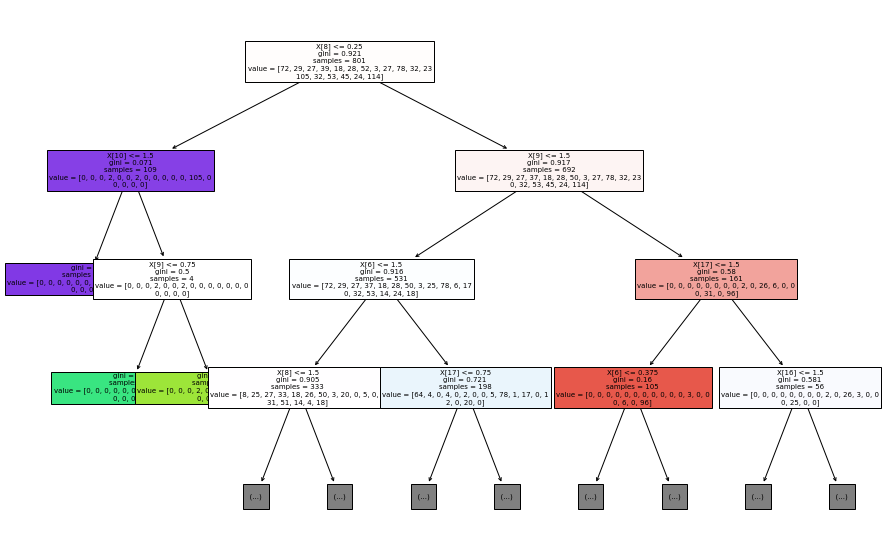

In [258]:
plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled = True, max_depth = 3, fontsize = 7);

In [231]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.9609375


In [232]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.8881987577639752


In [233]:
Resultados = []
soma = 0

In [234]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = DecisionTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_train = m.score(x_test, y_test)
    
    Resultados.append(resultado_train)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name'])
# df1   
# m

In [235]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name    0.897267
dtype: float64 Column_Name    0.826087
dtype: float64 Column_Name    0.937888
dtype: float64 Column_Name    0.023043
dtype: float64


In [236]:
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bug       0.94      0.89      0.91        18
        dark       1.00      1.00      1.00         3
      dragon       1.00      1.00      1.00         4
    electric       1.00      1.00      1.00         5
       fairy       1.00      1.00      1.00         3
    fighting       1.00      1.00      1.00         3
        fire       1.00      1.00      1.00         6
      flying       0.00      0.00      0.00         1
       ghost       0.80      1.00      0.89         8
       grass       1.00      0.95      0.98        22
      ground       1.00      0.50      0.67         6
         ice       1.00      0.86      0.92         7
      normal       1.00      1.00      1.00        21
      poison       0.83      1.00      0.91         5
     psychic       1.00      0.89      0.94         9
        rock       0.77      1.00      0.87        10
       steel       0.83      1.00      0.91         5
       water       0.85    

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 
Matriz de Confusão: 
 [[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0

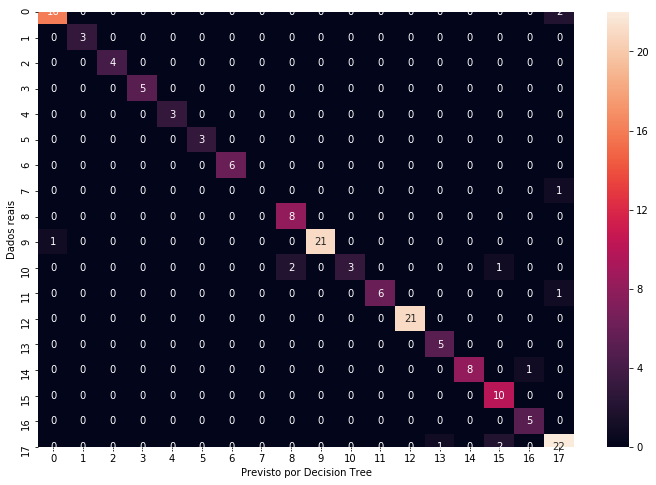

In [240]:
from sklearn.metrics import confusion_matrix # perguntar pra barbara

confusion_matrix( y_pred, y_test)

matriz_decision_tree = confusion_matrix(y_test, y_pred)
print(' ')
print ("Matriz de Confusão: \n", matriz_decision_tree)
# Para visualização:
plt.figure(figsize = (12, 8))
sns.heatmap(matriz_decision_tree, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Decision Tree')
plt.ylabel('Dados reais')
plt.show()
#  deixar a colorida

In [249]:
pd.crosstab( y_pred, y_test)

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
row_0,,,,,,,,,,,,,,,,,,
bug,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
dark,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dragon,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
electric,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fairy,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
fighting,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
fire,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0
ghost,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0
grass,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0


In [264]:
print('ignora o q ta entre o "x"s')
print('x'*125)

ignora o q ta entre o "x"s
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [260]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

ValueError: could not convert string to float: 'psychic'

In [195]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


In [ ]:
https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

In [267]:
print('x'*125)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [268]:
# bibliotecas básicas para manipular qualquer modelo
import numpy as np
import pandas as pd 
import sklearn

# separador entre base de treino e de teste
from sklearn.model_selection import train_test_split

# ferramenta de normalização, essencial para o modelo
from sklearn.preprocessing import StandardScaler

# o modelo de classificação propriamente dito
from sklearn.neighbors import KNeighborsClassifier

# algumas funções para testar o modelo posteriormete:
# (explicadas no Turing Talks #11)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [269]:
# dataset = pd.read_csv('diabetes.csv')
# dataset.head()

In [270]:
# X = dataset.iloc[:,0:8] # todas as colunas, menos o diagnóstico 
# y = dataset['Outcome']  # resultados que nós queremos (respostas)

# reservamos 20% dos dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

In [271]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [272]:
# definindo o modelo
classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [273]:
resultado_test = classifier.score(x_test, y_test)
resultado_test 

0.7577639751552795

In [32]:
https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1  Link do de cima

SyntaxError: invalid syntax (<ipython-input-32-3f00c336854a>, line 1)

In [68]:
df = pd.read_csv("pokemon.csv")
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [69]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]

In [70]:
from sklearn.tree import ExtraTreeClassifier

model1 = ExtraTreeClassifier () 
m = model1.fit(x_train, y_train)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [72]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.9390625


In [73]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.9627329192546584


In [74]:
Resultados = []
soma = 0

In [75]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = ExtraTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_test = m.score(x_test, y_test)
    
    Resultados.append(resultado_test)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name2'])
# df1   
# m

In [76]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name2    0.898758
dtype: float64 Column_Name2    0.857143
dtype: float64 Column_Name2    0.950311
dtype: float64 Column_Name2    0.020399
dtype: float64
